## データ探索の進め方
EDA（探索的データ解析）の例、進める時のやり方の例みたいなのを記述

1. jupyter lab/notebookの起動方法
1. データの読み込み方法(Datasetクラスの利用)
1. BIツール or Matplotlib等で自由にEDAしていく

### 1. jupyter lab/notebookの起動方法

#### 初めて起動する時
condaの環境をipythonに教えてあげる必要があるので下記コマンドをterminalで実行する。

`ipython kernel install --user --name isid`

次に次のコマンドを打って、isid環境がlistに乗っていればOK

`jupyter kernelspec list`

#### 2回目以降

`activate isid`

terminalでisid環境にし、

`jupyter lab`

起動コマンドを打てば、起動するはず。

![](./img/1.jpg)

最初のactivateはしないと、jupyter labで"No Kernel!"と言われ動かない。ここで使いたい環境(今回はisid)を選ぶと、その環境下のnotebookが作れる

### 2. データの読み込み方法(Datasetクラスの利用)

1ができたらあとはセルにpythonのコードを掛けば実行できるようになる

今回はまずデータを読み込む例を実行する例を記述する

In [1]:
# pythonの自作関数がある場所を教えてあげる
# （ipynbファイルの場所がrootになるっぽいので、ここは読み込ませたいフォルダの絶対パスを追加する）
import sys
sys.path.append('D://isid_phm/src/')

In [3]:
# 自作関数の読み込み
from libs.Dataset import Dataset

In [5]:
# データの読み込み
df = Dataset().load_data()

In [7]:
df.head()

,Altitude,Mach #,Flight Regime,Power Setting (TRA),T2 Total temperature at fan inlet ｰR,T24 Total temperature at LPC outlet ｰR,T30 Total temperature at HPC outlet ｰR,T50 Total temperature at LPT outlet ｰR,P2 Pressure at fan inlet psia,P15 Total pressure in bypass-duct psia,P30 Total pressure at HPC outlet psia,Nf Physical fan speed rpm,Nc Physical core speed rpm,epr Engine pressure ratio (P50/P2) --,Ps30 Static pressure at HPC outlet psia,phi Ratio of fuel flow to Ps30 pps/psi,NRf Corrected fan speed rpm,NRc Corrected core speed rpm,BPR Bypass Ratio --,farB Burner fuel-air ratio --,htBleed (Bleed Enthalpy),Nf_dmd Demanded fan speed rpm,PCNfR_dmd Demanded corrected fan speed rpm,W31 HPT coolant bleed lbm/s,W32 LPT coolant bleed lbm/s,is_train,duration,engine_dead,dead_duration,engine_no,is_valid
0,34.998,0.8400,5,100,449.44,555.32,1358.6,1137.2,5.48,8.00,194.64,2222.7,8341.9,1.02,42.02,183.06,2387.7,8048.6,9.3461,0.02,334,2223,100.00,14.73,8.8071,1,0,0,148,Train_Engine_001_reuse_0,0
1,41.998,0.8408,6,100,445.00,549.90,1353.2,1125.8,3.91,5.71,138.51,2211.6,8304.0,1.02,42.20,130.42,2387.7,8072.3,9.3774,0.02,330,2212,100.00,10.41,6.2665,1,1,0,148,Train_Engine_001_reuse_0,0
2,24.999,0.6218,4,60,462.54,537.31,1256.8,1047.5,7.05,9.02,175.71,1915.1,8001.4,0.94,36.69,164.22,2028.0,7864.9,10.8940,0.02,309,1915,84.93,14.08,8.6723,1,2,0,148,Train_Engine_001_reuse_0,0
3,42.008,0.8416,6,100,445.00,549.51,1354.0,1126.4,3.91,5.71,138.46,2211.6,8304.0,1.02,41.96,130.72,2387.6,8068.7,9.3528,0.02,329,2212,100.00,10.59,6.4701,1,3,0,148,Train_Engine_001_reuse_0,0
4,25.000,0.6203,4,60,462.54,537.07,1257.7,1047.9,7.05,9.03,175.05,1915.1,7993.2,0.94,36.89,164.31,2028.0,7861.2,10.8960,0.02,309,1915,84.93,14.13,8.5286,1,4,0,148,Train_Engine_001_reuse_0,0


In [8]:
df.shape

(211320, 31)

これでデータが読み込めた。このdfはtrainもtestのcsvを、全部結合させたものなのでこれが全データとなる。

In [11]:
# trainのデータの抜き出し
train = df[df['is_train'] == 1]
train.shape, train['engine_no'].nunique()

((198503, 31), 1180)

In [12]:
# testデータ
test = df[df['is_train'] == 0]
test.shape, test['engine_no'].nunique()

((12817, 31), 100)

### 3. BIツール or Matplotlib等で自由にEDAしていく

In [ ]:
# BIツール用に出力
df.to_csv('hoge/hoge.csv')

In [29]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

engines = df['engine_no'].unique()
eg_df = df[df['engine_no'] == np.random.choice(engines, 1)[0]]

C:\Users\km70446\AppData\Local\Continuum\anaconda3\envs\isid\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


DataError: No numeric types to aggregate

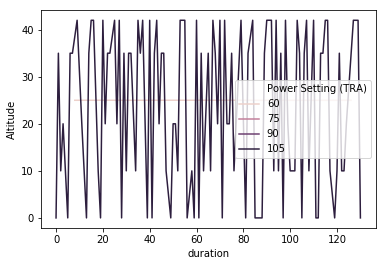

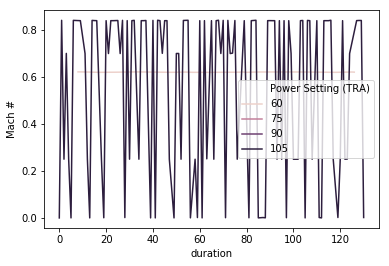

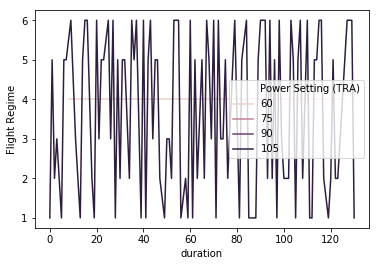

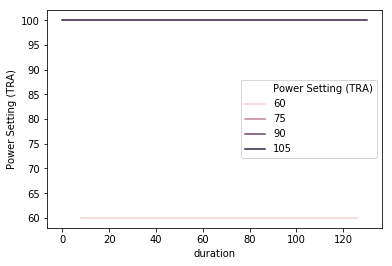

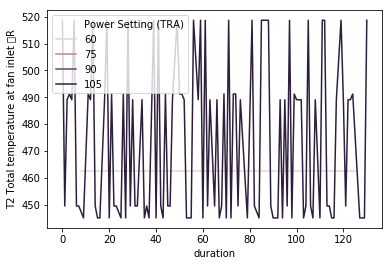

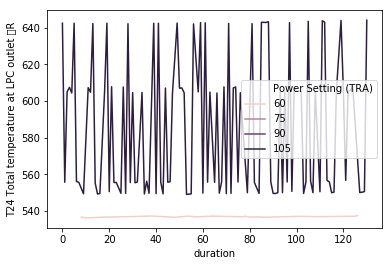

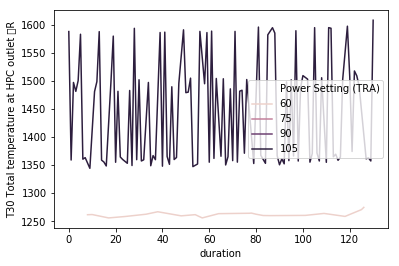

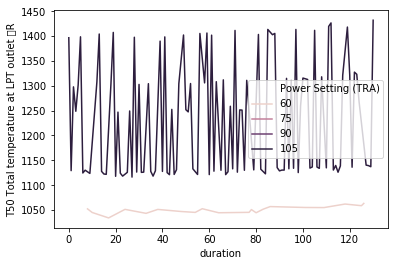

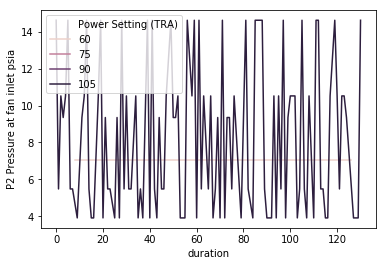

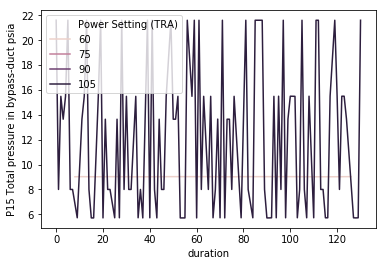

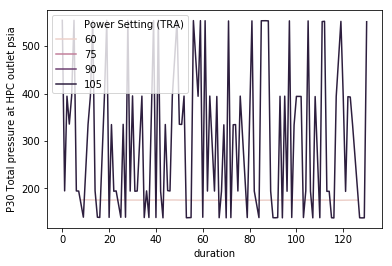

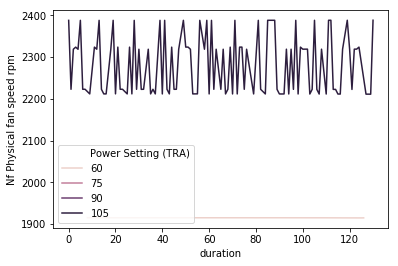

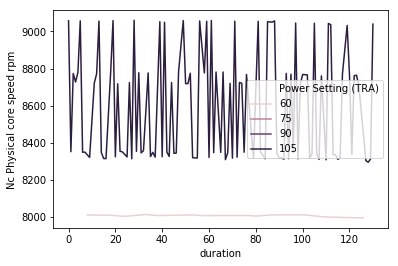

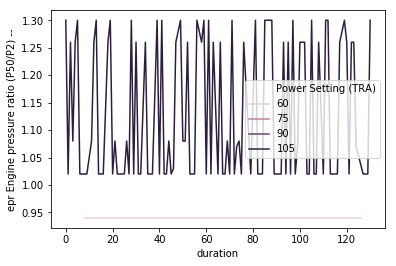

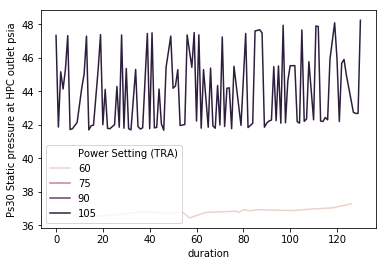

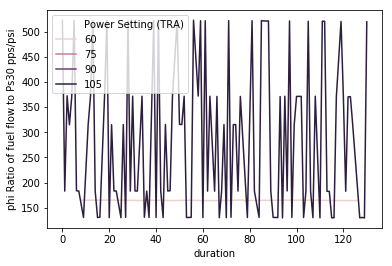

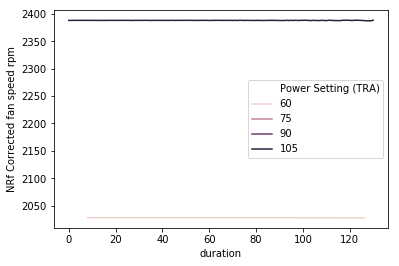

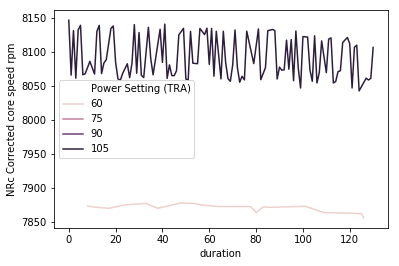

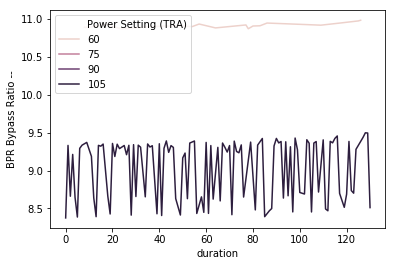

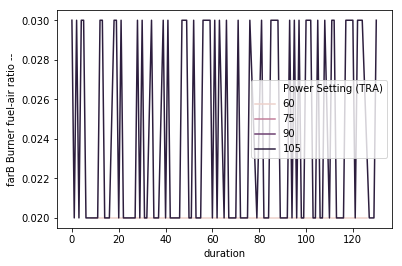

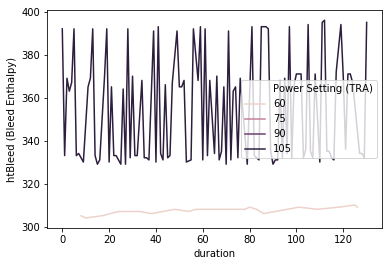

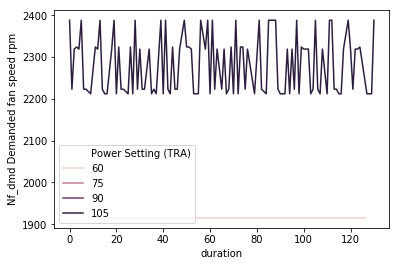

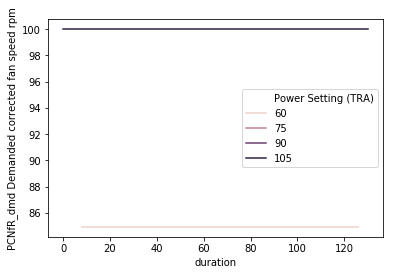

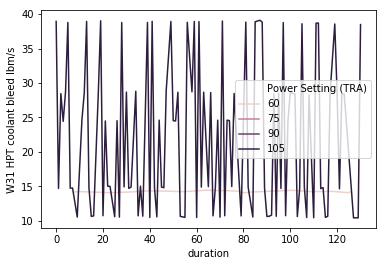

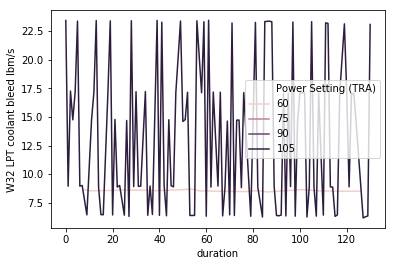

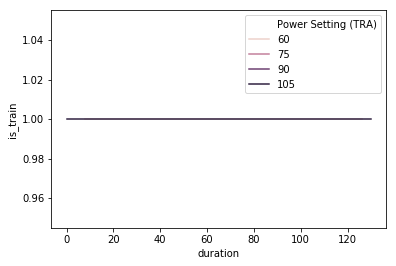

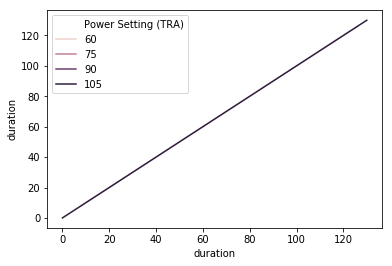

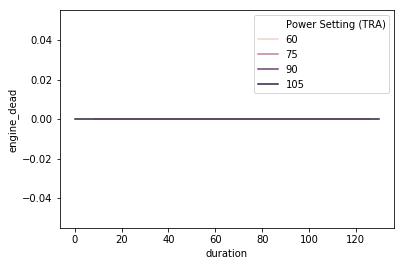

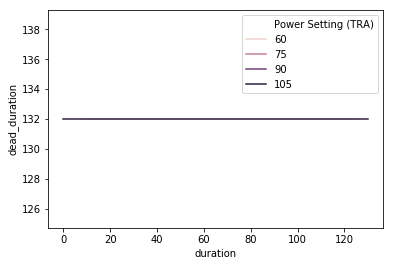

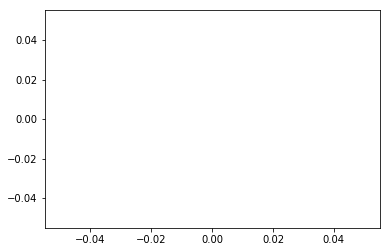

In [35]:
for col_i in eg_df.columns:
    plt.figure()
    sns.lineplot(x='duration', y=col_i, hue='Power Setting (TRA)', data=eg_df)